# Tests de Normalidad


Basado en los notebooks <br>
[A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/) <br>
[Testing for Normality applications with python](https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9)

In [ ]:
import scipy.stats as stats

In [ ]:
x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)
# Print the p values
print(stats.shapiro(x_10))
print(stats.shapiro(x_50))
print(stats.shapiro(x_100))
print(stats.shapiro(x_1000))

(0.9328190088272095, 0.4761855900287628)
(0.979789137840271, 0.5431036949157715)
(0.9931714534759521, 0.8981869220733643)
(0.9984437227249146, 0.5183961391448975)


In [ ]:
stats.shapiro?

## QQ plots - Grafica

In [ ]:
import statsmodels.api as sm
import pylab

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


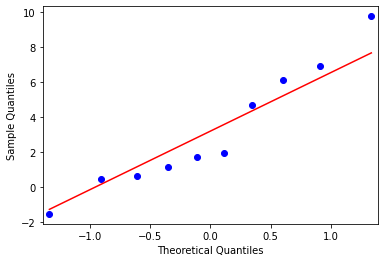

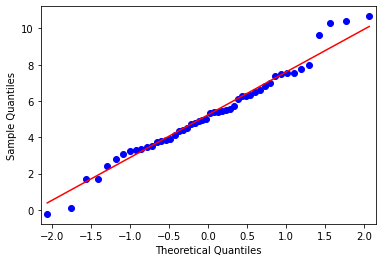

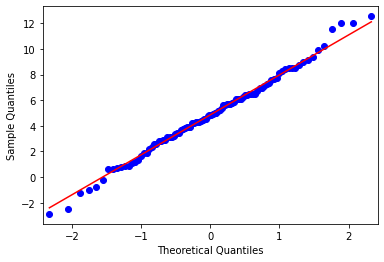

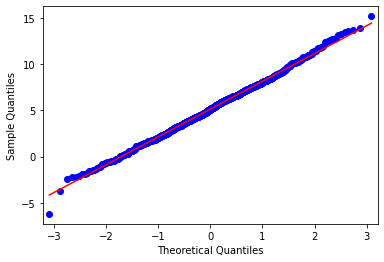

In [ ]:
sm.qqplot(x_10, line='s')
sm.qqplot(x_50, line='s')
sm.qqplot(x_100, line='s')
sm.qqplot(x_1000, line='s')
pylab.show()

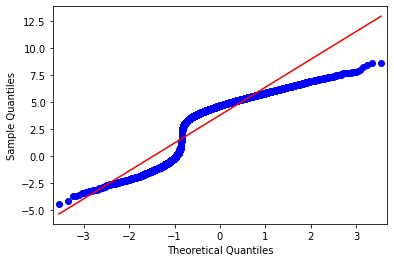

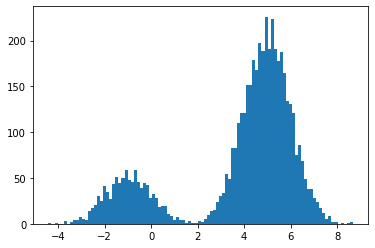

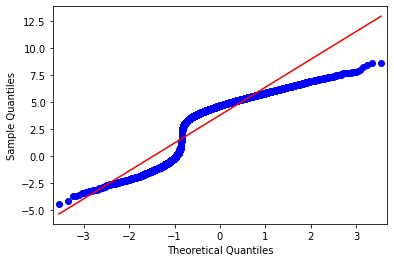

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Datos de una distribucion multi-modal
N = 10000
x_bimodal = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)),
                    np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
# Now Graph
res = plt.hist(x_bimodal, bins=100)
sm.qqplot(x_bimodal[:,0], line='s')

## Histogramas

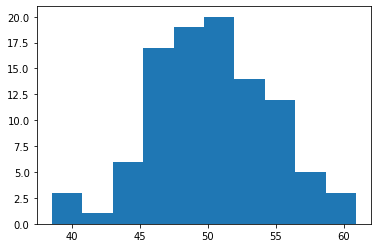

In [ ]:
from numpy import sqrt, ceil, int_
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# semilla de los numeros generados de forma aleatoria
seed(1)
# generar una mauestra de n=100
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data, int_(ceil(sqrt(len(data)))))
pyplot.show()

## Tests de normalidad Shapiro-Wilk

In [ ]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# semilla de numeros aleatorios
seed(1)
# generar observaciones univariadas
data = 5 * randn(100) + 50
# test de normalizad Shapiro-Wilk
stat, p = shapiro(x_bimodal)
print('Estadistico=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('La muestra parece Gaussian (no se rechaza H0)')
else:
	print('La muestra no parece Gaussiana (rechaza H0)')

Estadistico=0.832, p=0.000
La muestra no parece Gaussiana (rechaza H0)


## Tests de D'Agostino y Pearson



In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# semilla de numeros aleatorios
seed(1)
# generar observaciones univariadas
data = 5 * randn(100) + 50
# prueba de normalidad
stat, p = normaltest(data)
print('Estadistico=%.3f, p=%.3f' % (stat, p))
# interpretacion
alpha = 0.05
if p > alpha:
	print('La muestra parece normal (no se rechaza H0)')
else:
  print('La muestra no parece normal (se rechaza H0)')

Estadistico=750.202, p=0.000
La muestra no parece normal (se rechaza H0)


In [ ]:
x_bimodal[:,0].shape

(5000,)

## Tests de normalidad de Anderson-Darling

El test de Anderson-Darling es un test estadistico que puede ser usado para evaluar si una muestra fue generada por una de varias muestras conocidas, llamadas por Theodore Anderson y Donald Darling. <br>

Se puede emplear para verificar si una muestra es normal. El test es una version modificada de un test estadistico no-parametrico conocido como la prueba de Kolmogorov-Smirnov. <br>

Una caracterisca de este test es que retorna una lista de valores criticos en vez de un solo valor p. Esto puede proveer la base para una interpretacion mas completa del resultado.

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# semilla de numeros aleatorios
seed(1)
# generar observaciones univariadas
data = 5 * randn(100) + 50
# prueba de normalidad
result = anderson(data)
print('Estadistico: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, la muestra parece Normal (no se rechaza H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, la muestra no parece Normal (se rechaza H0)' % (sl, cv))

Estadistico: 0.220
15.000: 0.555, la muestra parece Noral (no se rechaza H0)
10.000: 0.632, la muestra parece Noral (no se rechaza H0)
5.000: 0.759, la muestra parece Noral (no se rechaza H0)
2.500: 0.885, la muestra parece Noral (no se rechaza H0)
1.000: 1.053, la muestra parece Noral (no se rechaza H0)
